This notebook is a part of the work 'Nucleation patterns of polymer crystals analyzed by machine learning models' and is written by Atmika Bhardwaj (bhardwaj@ipfdd.de).

The following machine learning models are employed in this notebook: AutoEncoders (AE), Hierarchical Clustering (HC), Gaussian Mixture Models (GMM), Multilayer Perceptron (MLP). We start by reading a coordinate file (dump file from LAMMPS) and analyze it to study the local environmental information of every coarse-grained bead. Then, we train an AE to compress that information and train a GMM on the compressed data to classify each coarse-grained into amorphous or crytalline depending on its enviromental fingerprint.

This notebook imports all the functions from another file called all_functions.py


In [8]:
import glob
import random
import pickle
import numpy                  as     np
from   numpy.random           import seed
import matplotlib.pyplot      as     plt
import matplotlib.cm          as     cm
import h5py                   as     h5py
from   mpl_toolkits.mplot3d   import Axes3D
from   natsort                import natsorted
from   sklearn                import preprocessing, mixture
from   sklearn.cluster        import AgglomerativeClustering
from   keras.models           import load_model
import sys
sys.path.insert(0, '../../../Jupyters/')
from   all_functions          import *
import matplotlib.ticker      as mticker
seed(1)
plt.rcParams["figure.figsize"]  = (6,5)
plt.rcParams["figure.dpi"]      = 300
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [2]:
chainLength      = 1000
dx               = 0.4
Rmax             = 3.5
hid_dim          = 14
depth            = 14
nEpochs          = 600
VL               = 1
batchSize        = 20
validationSplit  = 0.2
L2               = 10e-7
LR               = 10e-5
g                = natsorted(glob.glob('../../../../01_raw_data/dump_files/dump.*'))


### GMM on the encoded data

In [3]:
h5_file          = h5py.File('../../../all_parameters.h5', 'r')
h5_keys          = natsorted(list(h5_file.keys()))
file_num         = -1
obj              = ReadCoordinates(g[file_num], chainLength)
rnd              = get_slice_indices(obj, 100, 68, axis = 2)
ae_training_data = np.array(h5_file.get(h5_keys[file_num]))[rnd]
ae_training_data = np.delete(ae_training_data, 10, axis = 1)
print(ae_training_data.shape)









(9954, 17)


Epoch 1/600


2023-09-26 16:49:07.613218: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-26 16:49:07.613775: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-26 16:49:07.613811: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-09-26 16:49:07.613842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-09-26 16:49:07.613873: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

399/399 [==============================] - 2s 2ms/step - loss: 0.3480 - val_loss: 0.1523 - lr: 1.0000e-04
Epoch 2/600
399/399 [==============================] - 1s 2ms/step - loss: 0.1098 - val_loss: 0.0887 - lr: 1.0000e-04
Epoch 3/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0868 - val_loss: 0.0809 - lr: 1.0000e-04
Epoch 4/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0805 - val_loss: 0.0755 - lr: 1.0000e-04
Epoch 5/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0755 - val_loss: 0.0710 - lr: 1.0000e-04
Epoch 6/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0715 - val_loss: 0.0676 - lr: 1.0000e-04
Epoch 7/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0684 - val_loss: 0.0653 - lr: 1.0000e-04
Epoch 8/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0662 - val_loss: 0.0635 - lr: 1.0000e-04
Epoch 9/600
399/399 [==============================] - 1s 2ms/step -

399/399 [==============================] - 1s 2ms/step - loss: 0.0378 - val_loss: 0.0353 - lr: 1.0000e-04
Epoch 71/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0376 - val_loss: 0.0353 - lr: 1.0000e-04
Epoch 72/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0375 - val_loss: 0.0351 - lr: 1.0000e-04
Epoch 73/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0373 - val_loss: 0.0350 - lr: 1.0000e-04
Epoch 74/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0371 - val_loss: 0.0347 - lr: 1.0000e-04
Epoch 75/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0369 - val_loss: 0.0347 - lr: 1.0000e-04
Epoch 76/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0367 - val_loss: 0.0346 - lr: 1.0000e-04
Epoch 77/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0366 - val_loss: 0.0342 - lr: 1.0000e-04
Epoch 78/600
399/399 [==============================] - 1s 2m

399/399 [==============================] - 1s 2ms/step - loss: 0.0299 - val_loss: 0.0284 - lr: 1.0000e-04
Epoch 139/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0299 - val_loss: 0.0282 - lr: 1.0000e-04
Epoch 140/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0298 - val_loss: 0.0282 - lr: 1.0000e-04
Epoch 141/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0298 - val_loss: 0.0278 - lr: 1.0000e-04
Epoch 142/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0298 - val_loss: 0.0278 - lr: 1.0000e-04
Epoch 143/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0297 - val_loss: 0.0277 - lr: 1.0000e-04
Epoch 144/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0296 - val_loss: 0.0276 - lr: 1.0000e-04
Epoch 145/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0296 - val_loss: 0.0278 - lr: 1.0000e-04
Epoch 146/600
399/399 [==============================]

399/399 [==============================] - 1s 2ms/step - loss: 0.0275 - val_loss: 0.0260 - lr: 1.0000e-04
Epoch 207/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0274 - val_loss: 0.0260 - lr: 1.0000e-04
Epoch 208/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0274 - val_loss: 0.0259 - lr: 1.0000e-04
Epoch 209/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0273 - val_loss: 0.0258 - lr: 1.0000e-04
Epoch 210/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0274 - val_loss: 0.0264 - lr: 1.0000e-04
Epoch 211/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0273 - val_loss: 0.0259 - lr: 1.0000e-04
Epoch 212/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0273 - val_loss: 0.0261 - lr: 1.0000e-04
Epoch 213/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0272 - val_loss: 0.0261 - lr: 1.0000e-04
Epoch 214/600
399/399 [==============================]

399/399 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0247 - lr: 1.0000e-04
Epoch 275/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0246 - lr: 1.0000e-04
Epoch 276/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0247 - lr: 1.0000e-04
Epoch 277/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0247 - lr: 1.0000e-04
Epoch 278/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0249 - lr: 1.0000e-04
Epoch 279/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0247 - lr: 1.0000e-04
Epoch 280/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0259 - val_loss: 0.0244 - lr: 1.0000e-04
Epoch 281/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0259 - val_loss: 0.0246 - lr: 1.0000e-04
Epoch 282/600
399/399 [==============================]

399/399 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0240 - lr: 5.0000e-05
Epoch 343/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0242 - lr: 5.0000e-05
Epoch 344/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0240 - lr: 5.0000e-05
Epoch 345/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0240 - lr: 5.0000e-05
Epoch 346/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0243 - lr: 5.0000e-05
Epoch 347/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0248 - val_loss: 0.0241 - lr: 5.0000e-05
Epoch 348/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0249 - val_loss: 0.0244 - lr: 5.0000e-05
Epoch 349/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0248 - val_loss: 0.0240 - lr: 5.0000e-05
Epoch 350/600
399/399 [==============================]

399/399 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0238 - lr: 1.2500e-05
Epoch 411/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0238 - lr: 1.2500e-05
Epoch 412/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0238 - lr: 1.2500e-05
Epoch 413/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0238 - lr: 1.2500e-05
Epoch 414/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0237 - lr: 1.2500e-05
Epoch 415/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0238 - lr: 1.2500e-05
Epoch 416/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0238 - lr: 1.2500e-05
Epoch 417/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0238 - lr: 1.2500e-05
Epoch 418/600
399/399 [==============================]

399/399 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0237 - lr: 6.2500e-06
Epoch 479/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0237 - lr: 3.1250e-06
Epoch 480/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0237 - lr: 3.1250e-06
Epoch 481/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0237 - lr: 3.1250e-06
Epoch 482/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0237 - lr: 3.1250e-06
Epoch 483/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0237 - lr: 3.1250e-06
Epoch 484/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0237 - lr: 3.1250e-06
Epoch 485/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0237 - lr: 3.1250e-06
Epoch 486/600
399/399 [==============================]

399/399 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0237 - lr: 7.8125e-07
Epoch 547/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0237 - lr: 7.8125e-07
Epoch 548/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0237 - lr: 7.8125e-07
Epoch 549/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0237 - lr: 7.8125e-07
Epoch 550/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0237 - lr: 7.8125e-07
Epoch 551/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0237 - lr: 7.8125e-07
Epoch 552/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0237 - lr: 7.8125e-07
Epoch 553/600
399/399 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0237 - lr: 7.8125e-07
Epoch 554/600
399/399 [==============================]

2023-09-26 16:56:10.753252: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ae_slice.sav/assets
[[0.95697254 3.0573835 ]
 [0.92228246 2.6900442 ]
 [0.94177765 3.0369914 ]
 [0.90520936 2.9435208 ]
 [0.9336659  3.0563135 ]]


/tmp/ipykernel_238200/2252856484.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,0.5)


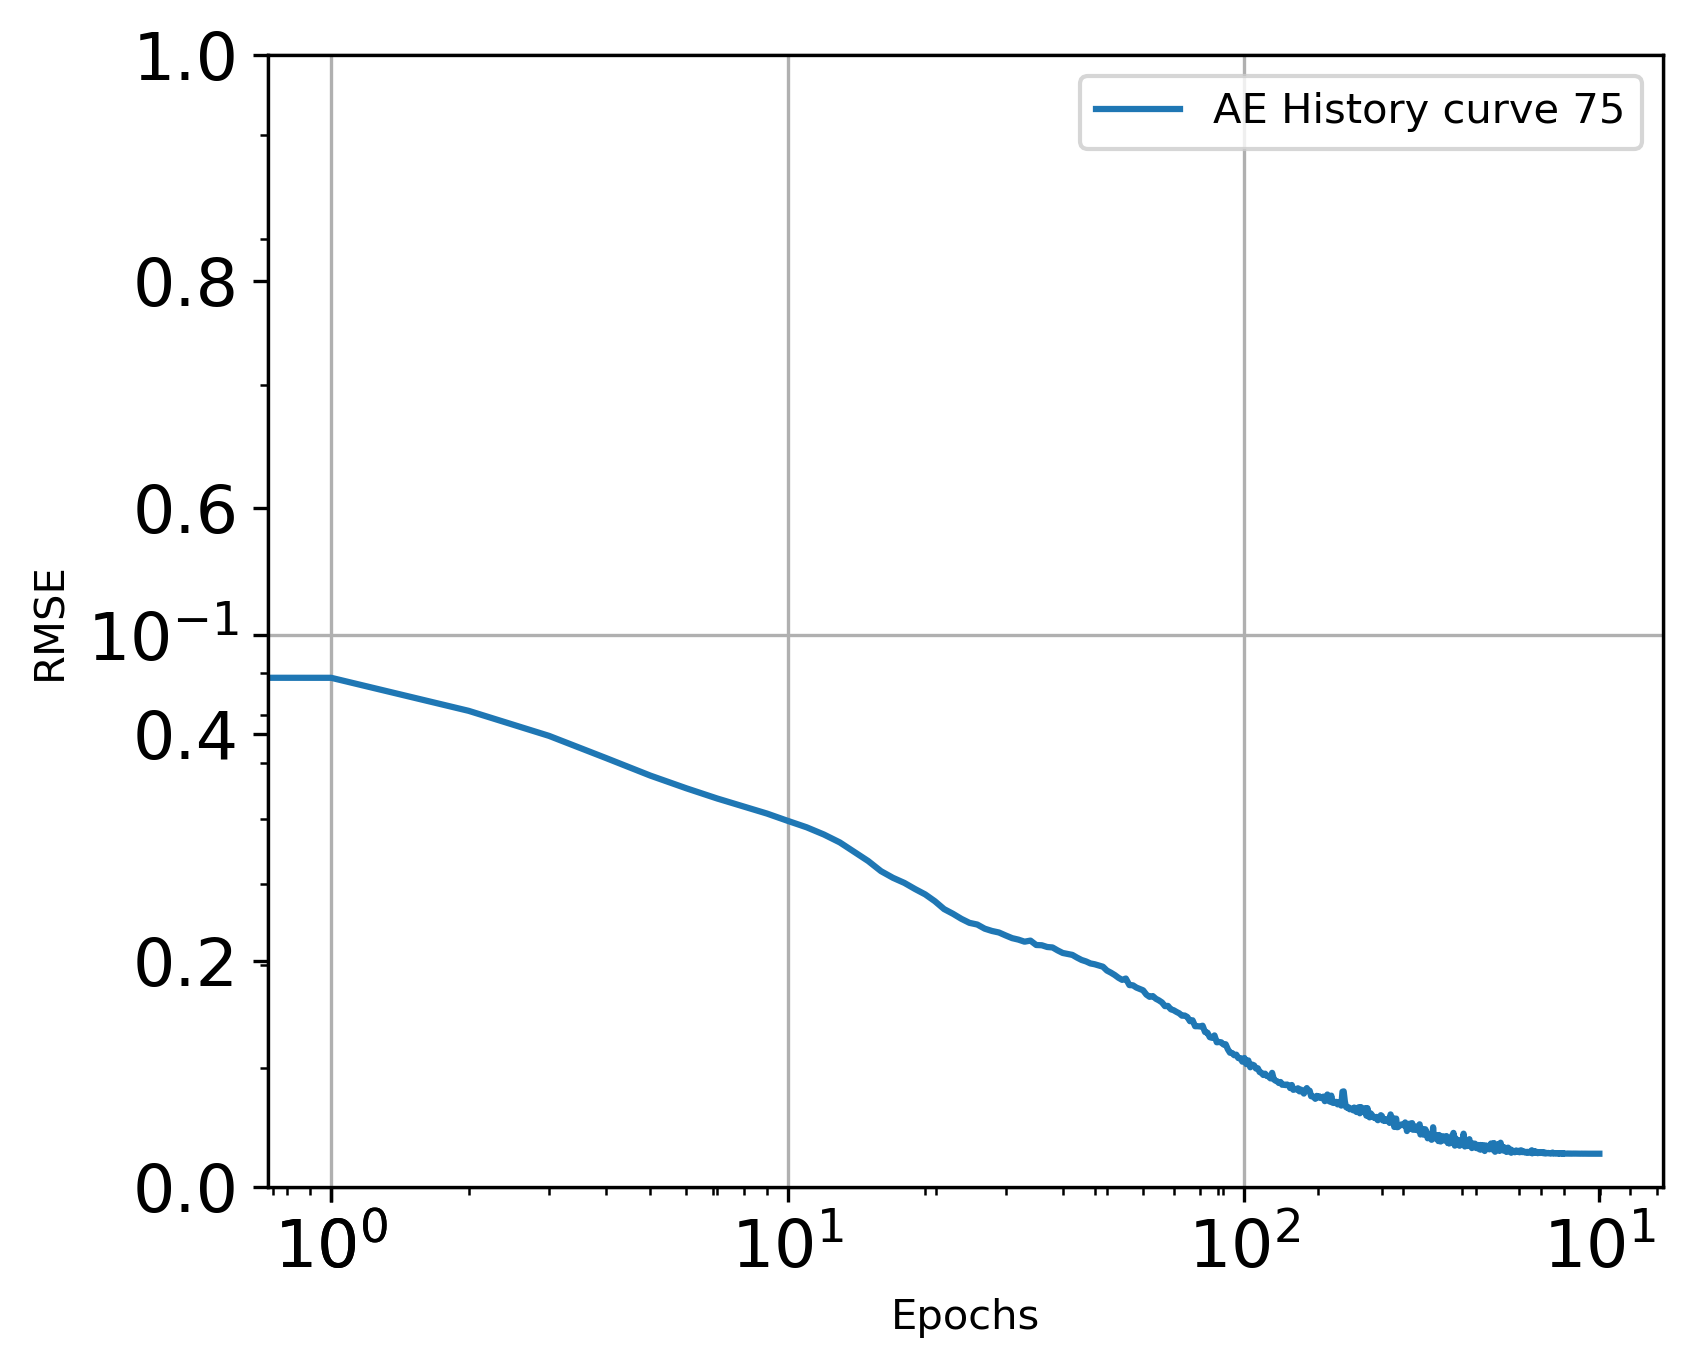

In [4]:
autoencoder, encoder, hist, encoded = fixedSeeds(2, hid_dim, ae_training_data, depth, "elu", L2, VL, nEpochs, LR, validationSplit, batchSize, 'ae_slice.sav')

histories = [hist]
names     = ["AE History curve 75", "hist2"]
fig = plt.figure()
plt.xscale("log")
ax  = plt.axes(xscale='log', yscale='log')
ax.grid()
c=0
for h in histories:
    l  = h.history["loss"]
    lv = h.history["val_loss"]
    t  = np.arange(len(l))
    name=names[c]
    plt.plot(t, lv , label=name)
    c+=1
plt.ylim(0,0.5)
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()


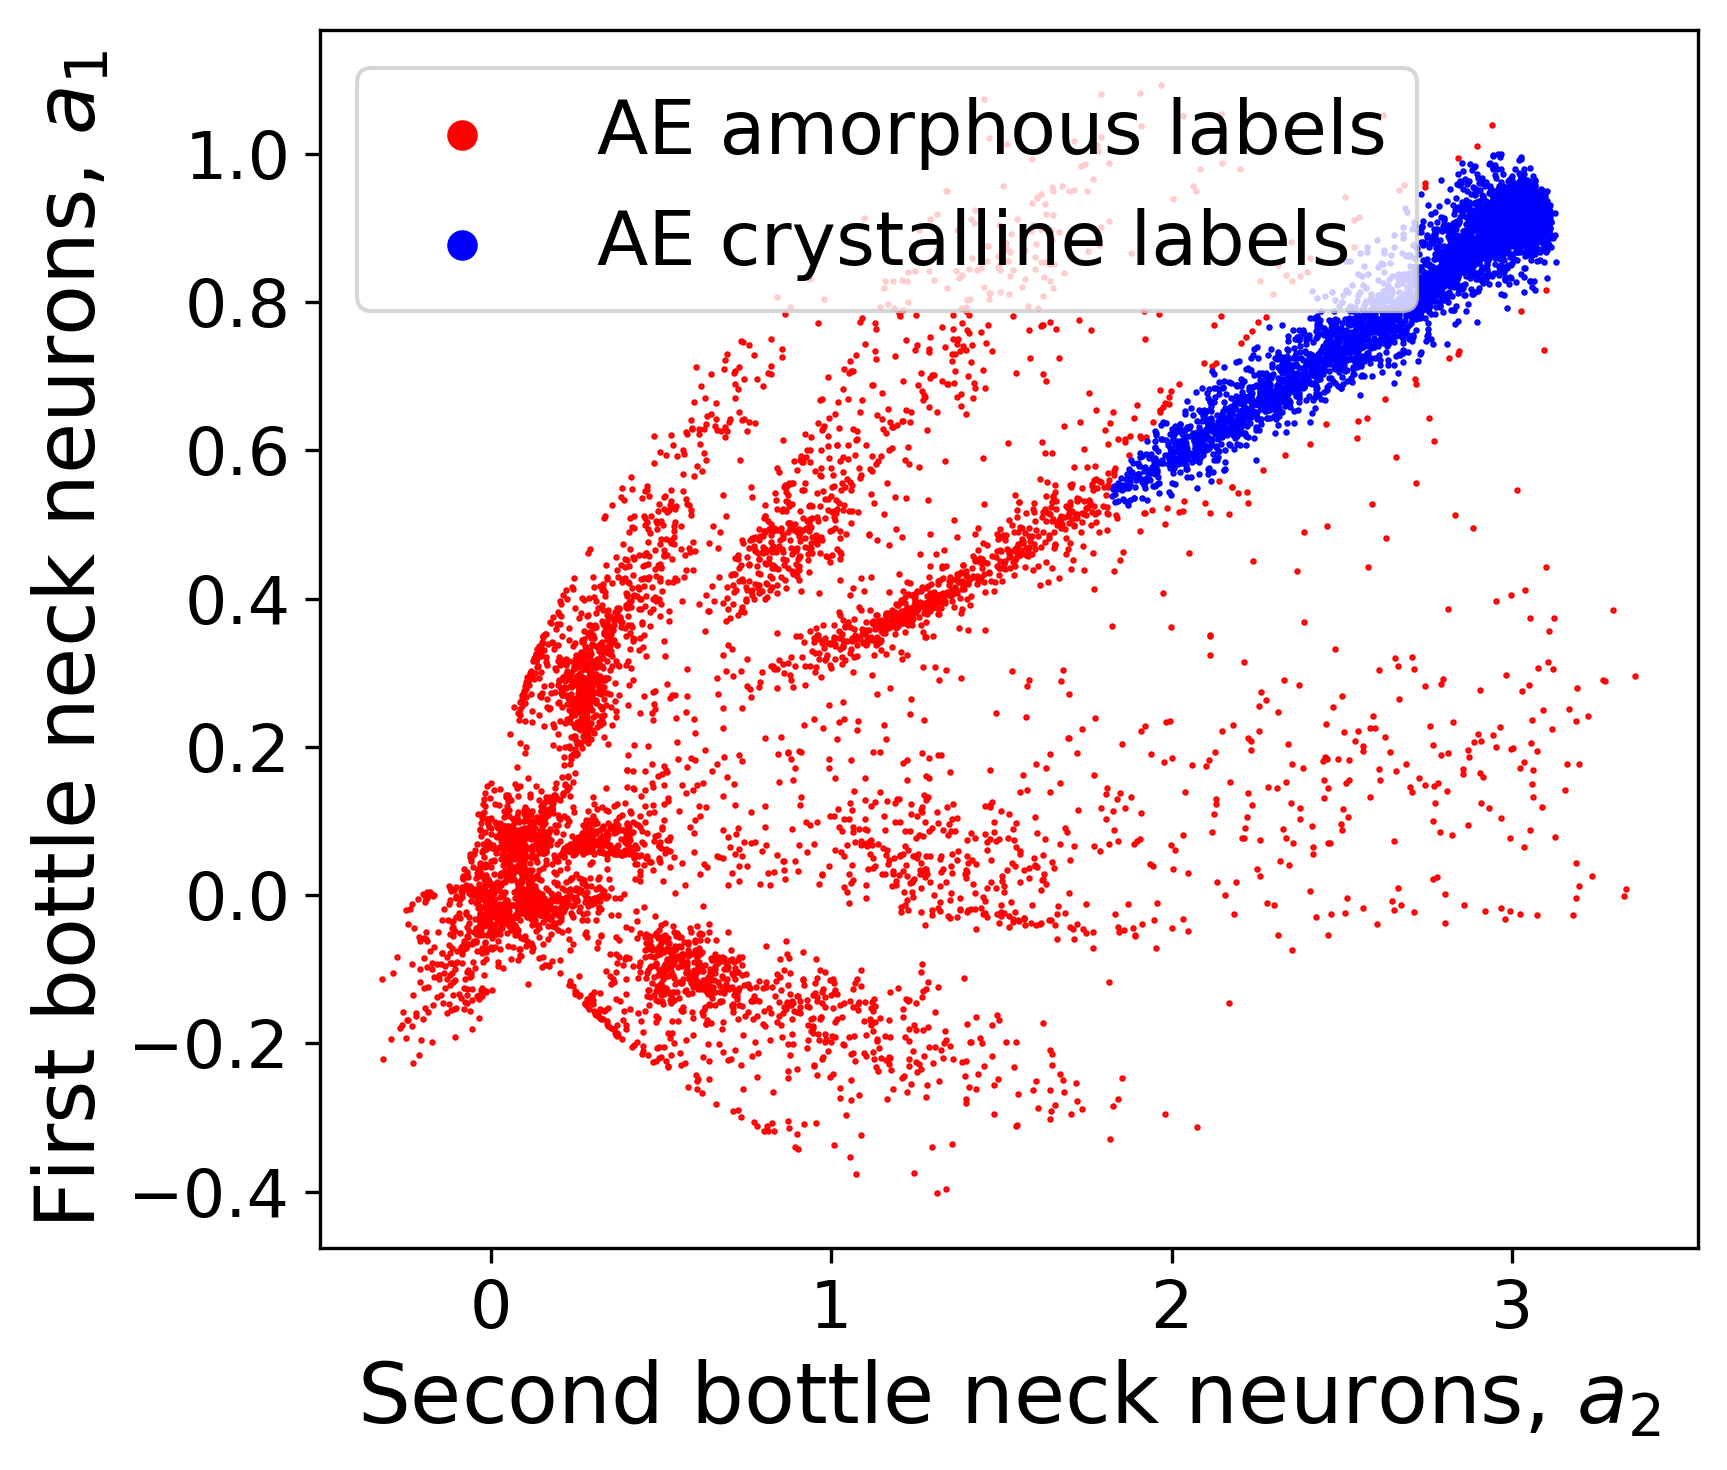

In [6]:
#autoenc  = load_model("ae_slice.sav")
#encoded  = autoenc.predict(ae_training_data)

gmm = mixture.GaussianMixture(n_components = 2, covariance_type = "full")
yhc = gmm.fit_predict(encoded)

fig = plt.figure()
p1 = encoded[yhc==0]
plt.scatter(p1[:,1], p1[:,0], c = 'red',  s = 0.3, label = 'AE amorphous labels')
p1 = encoded[yhc==1]
plt.scatter(p1[:,1], p1[:,0], c = 'blue', s = 0.3, label = 'AE crystalline labels')

plt.xlabel('Second bottle neck neurons, $a_2$', fontsize = 20)
plt.ylabel('First bottle neck neurons, $a_1$',  fontsize = 20)
lgnd     = plt.legend(fontsize=18)
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
    
plt.tight_layout()
plt.show()


0.06832156684126622

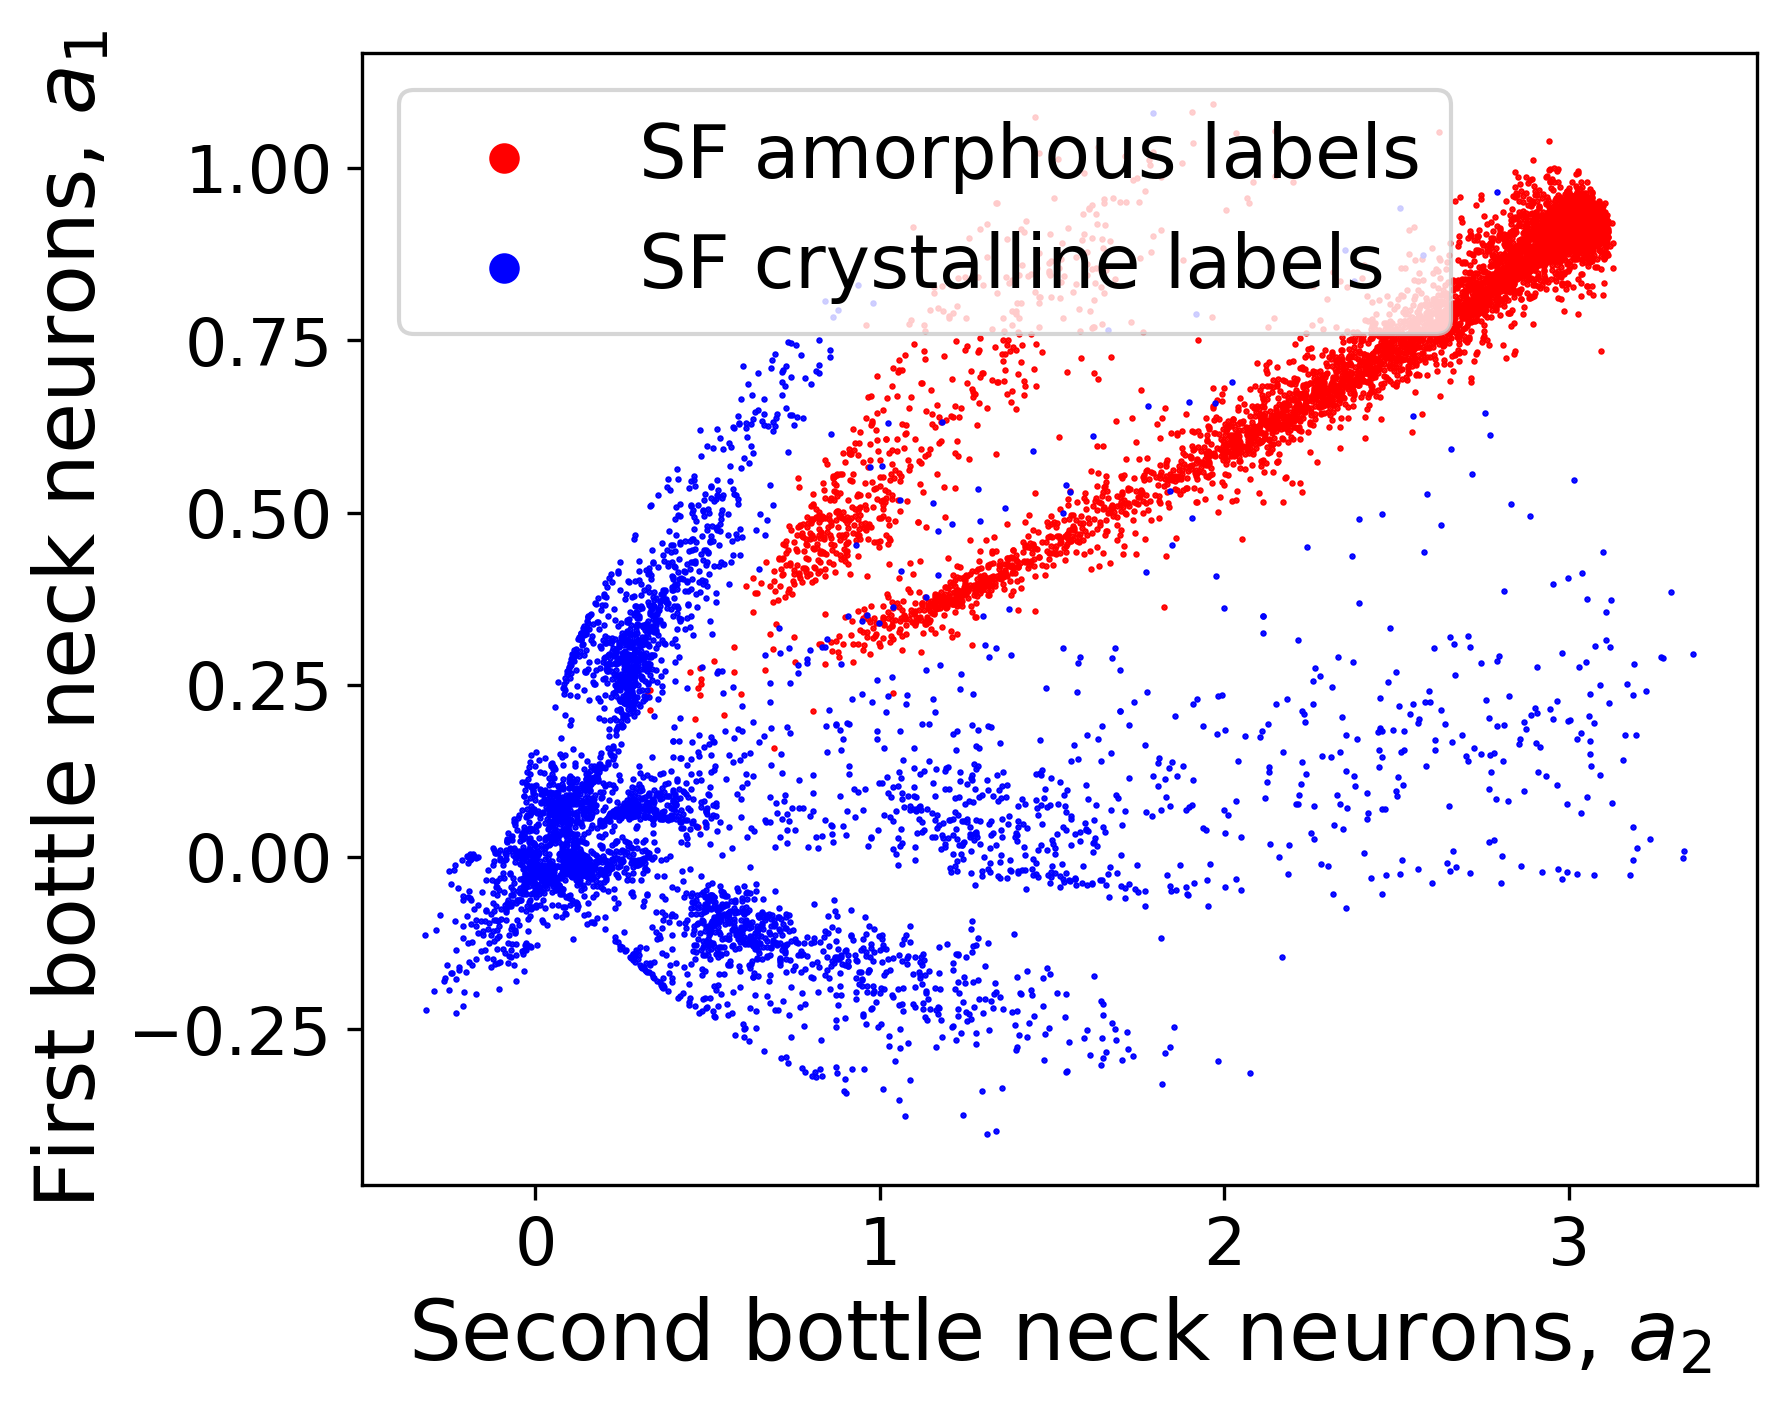

In [10]:
hc  = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
sf = hc.fit_predict(ae_training_data)

fig = plt.figure()
p1 = encoded[sf==0]
plt.scatter(p1[:,1], p1[:,0], c = 'red',  s = 0.3, label = 'SF amorphous labels')
p1 = encoded[sf==1]
plt.scatter(p1[:,1], p1[:,0], c = 'blue', s = 0.3, label = 'SF crystalline labels')

plt.xlabel('Second bottle neck neurons, $a_2$', fontsize = 20)
plt.ylabel('First bottle neck neurons, $a_1$',  fontsize = 20)
lgnd     = plt.legend(fontsize=18)
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])

In [11]:
yhcae = np.where(yhc==1)[0]
yhcff = np.where(sf ==0)[0]

sum(np.in1d(yhcae, yhcff))/len(yhcae)*100

99.93167843315874

## Predictions on the whole time series using the trained model

In [12]:
all_labels_ae  = []
all_encoded    = []
autoenc        = load_model('ae_slice.sav')

for i in np.arange(len(g)):
    
    training_data  = np.array(h5_file.get(h5_keys[i]))
    training_data  = np.delete(training_data, 10, axis = 1)
    encoded_output = autoenc.predict(training_data)
    all_encoded.append(encoded_output)
    
    label_ae   = gmm.predict(encoded_output)
    all_labels_ae.append(label_ae)
    print(i)
    
filename = 'AE_encoded.sav'
pickle.dump(all_encoded,     open(filename, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
filename = 'AE_labels.sav'
pickle.dump(all_labels_ae,   open(filename, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
